In [0]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The idea behind PCA is summed up as being used to carry out feature reduction to return only the features that explain a lot of the dataset in the least amount of information.

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [0]:
breast= pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [0]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Principal Component Analysis

In [0]:
from sklearn.preprocessing import  StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(breast)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data = scaler.transform(breast)

In [0]:
breast_pca = PCA(n_components=2)

In [0]:
breast_pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
fit_pca = breast_pca.transform(scaled_data)

Text(0,0.5,'Second Principal Component')

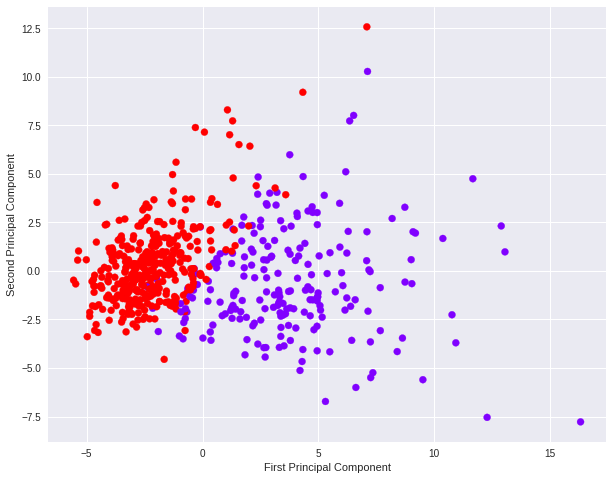

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(fit_pca[:,0],fit_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [0]:
data_comp = pd.DataFrame(breast_pca.components_, columns=cancer['feature_names'])

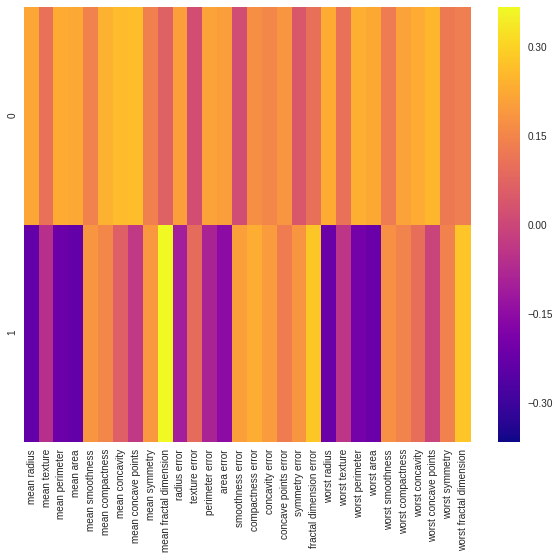

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(data_comp, cmap='plasma')

# Attempt Logistic Regression on the Principal Components

In [21]:
data_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [28]:
fit_pca.itemsize

8

In [0]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
X = cancer
y = brc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [0]:
pca_LR = LogisticRegression()

In [0]:
pca_LR.fit(fit_pca)